# Aula 1 - Explorando os dados com Pandas

In [1]:
#importando a biblioteca
import pandas as pd


In [2]:
#importando a base de dados
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
#Visualizado a base de dados
#entendi que é uma base que tem o salário de trabalhadores da area de dados
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
print(df)

        work_year experience_level employment_type                 job_title  \
0          2025.0               SE              FT        Solutions Engineer   
1          2025.0               SE              FT        Solutions Engineer   
2          2025.0               MI              FT             Data Engineer   
3          2025.0               MI              FT             Data Engineer   
4          2025.0               EN              FT             Data Engineer   
...           ...              ...             ...                       ...   
133344     2020.0               SE              FT            Data Scientist   
133345     2021.0               MI              FT  Principal Data Scientist   
133346     2020.0               EN              FT            Data Scientist   
133347     2020.0               EN              CT     Business Data Analyst   
133348     2021.0               SE              FT            Data Scientist   

         salary salary_currency  salary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [6]:
#descrição de estatística, então só pega as coluna numéricas
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
#tamanho da base, ele é um atributo e não uma função, por isso não tem parenteses. o primeiro é a quantidade de linhas e o outro é o número de colunas
df.shape

(133349, 11)

In [8]:
#criando duas variavies
linhas, colunas = df.shape[0], df.shape[1]
print("o número de linhas:", linhas)
print("o número de colunas:",colunas)

o número de linhas: 133349
o número de colunas: 11


In [9]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [10]:
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=renomear_colunas, inplace=True)
df.columns


Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [11]:
#analisar colunas categóricas
df["senioridade"].value_counts()

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

In [12]:
df["contrato"].value_counts()

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [13]:
df["remoto"].value_counts() #0 presencial; 100 remoto; 50 hibrido

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

In [14]:
df["tamanho_empresa"].value_counts()

tamanho_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

In [15]:
#traduzir categorias

senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].map(senioridade) #pode ser usado o meto replace ou map
df['senioridade'].value_counts()

senioridade
Senior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64

In [16]:
traducao_contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Meio Período',
    'FL': 'Freelancer'
}

df['contrato'] = df['contrato'].replace(traducao_contrato)

df['contrato'].value_counts()

contrato
Tempo Integral    132563
Contrato             394
Meio Período         376
Freelancer            16
Name: count, dtype: int64

In [17]:
traducao_tamanho_empresa = {
    'M': 'Média',
    'L': 'Grande',
    'S': 'Pequena'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(traducao_tamanho_empresa)

df['tamanho_empresa'].value_counts()

tamanho_empresa
Média      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [18]:
traducao_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].map(traducao_remoto)

df['remoto'].value_counts()

remoto
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64

In [19]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [20]:
df.describe(include='object') #esse metodo também dá para usar em colunas descritivas

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [21]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# Aula 2 - Limpeza dos Dados

In [22]:
#identificando dados nulos
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [23]:
#10 campos de anos estão com dados faltantes
df.isnull().sum()

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [24]:
#esse metodo traz os valores específicos dentro dessa coluna
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [25]:
#identificando as linhas que estão com esse campo nan ou nulos
#filtro de tudo que é nulo e pedi para mostrar somente esses
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [26]:
#criando uma varialvel e excluindo as linhas em branco
df_limpo = df.dropna()

In [27]:
df_limpo.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [28]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [29]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [30]:
#converter o tipo da coluna ano de float para int
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype(int))
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [31]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


# Aula 3 - Criação de Gráficos

In [32]:
df_limpo.head(10)

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média
5,2025,Junior,Tempo Integral,Data Engineer,80000,USD,80000,US,Presencial,US,Média
6,2025,Senior,Tempo Integral,Data Scientist,185000,USD,185000,US,Presencial,US,Média
7,2025,Senior,Tempo Integral,Data Scientist,148000,USD,148000,US,Presencial,US,Média
8,2025,Pleno,Tempo Integral,Data Scientist,135000,USD,135000,CA,Presencial,CA,Média
9,2025,Pleno,Tempo Integral,Data Scientist,108000,USD,108000,CA,Presencial,CA,Média


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

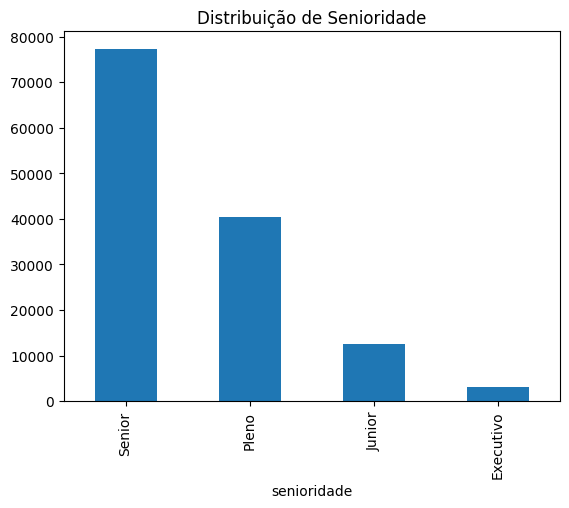

In [33]:
#plotar um gráfico com a prória biblioteca pandas
df_limpo['senioridade'].value_counts().plot(kind='bar',title = 'Distribuição de Senioridade')

esse gráfico mostra um ponto de atenção pois tem poucos juniors, será que estou treinando novos profissionais ? pois tem mais senior

In [34]:
# importando a bilioteca
import seaborn as sns


<Axes: xlabel='senioridade', ylabel='usd'>

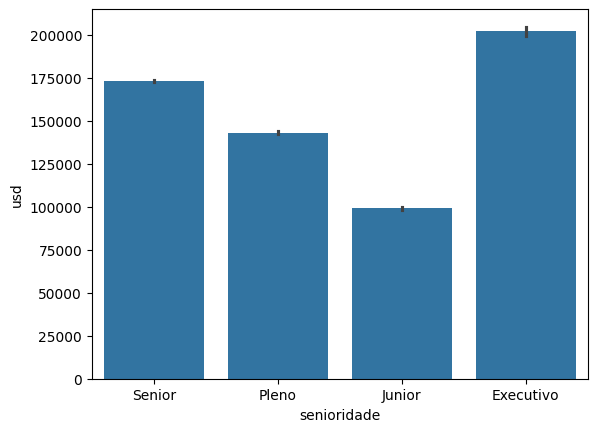

In [35]:
#salário médio para cada um dos níveis
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [36]:
#importando matplotlib pode ser usado em conjunto com a seaborn para personalizar. pyplot é um modulo dela
import matplotlib.pyplot as plt


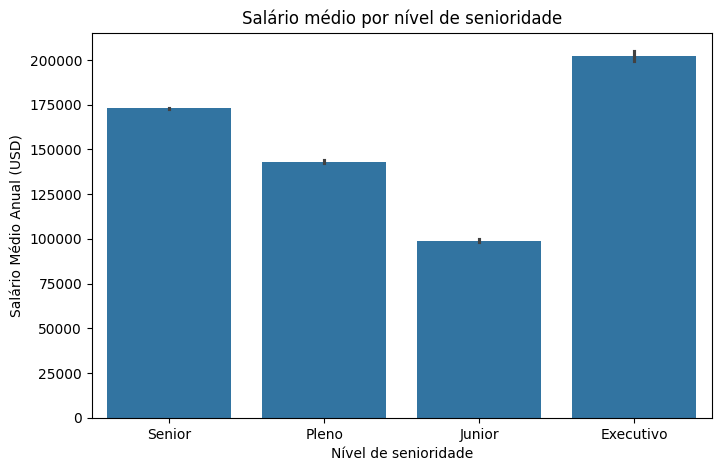

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Nível de senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

os dados precisam ser ordenados

In [38]:
#agrupando e ordenando
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

senioridade
Executivo    202027.667813
Senior       172850.838301
Pleno        143044.845979
Junior        99034.963267
Name: usd, dtype: float64

In [39]:
#salvar em uma variavel, para utilizar como paramentro no gráfico
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
ordem

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

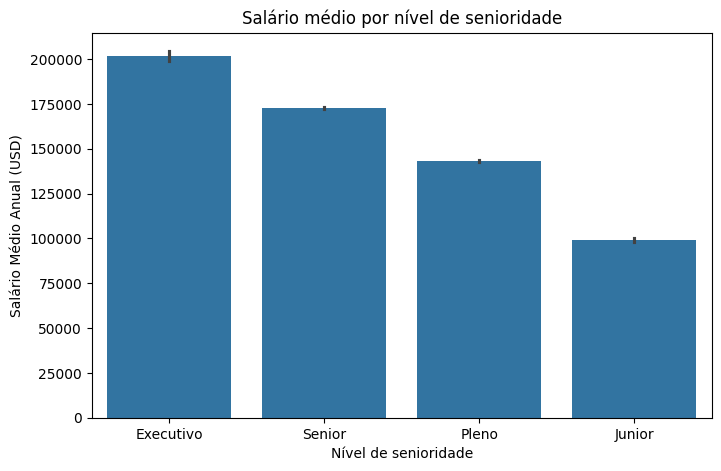

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd',order=ordem)
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Nível de senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

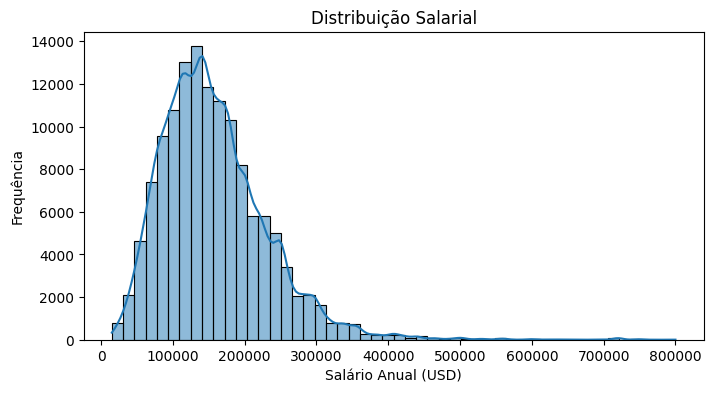

In [41]:
#bins é a largura das barras e kde é esse linha que contorna a distribuição

plt.figure(figsize=(8,4))
sns.histplot(df_limpo['usd'],bins=50,kde=True)
plt.title('Distribuição Salarial')
plt.xlabel('Salário Anual (USD)')
plt.ylabel('Frequência')
plt.show()


essa distribuição mostra que os valores salariais está voltada para os valores mais baixos. não está como uma distribuição normal, pois o pico não está no meio

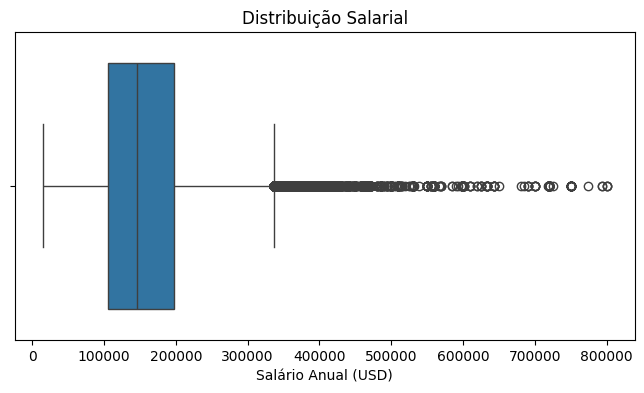

In [42]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_limpo['usd'])
plt.title('Distribuição Salarial')
plt.xlabel('Salário Anual (USD)')
plt.show()


mostra a disribuição com umas caixinhas, a linha do meio é a mediana. é posível ver as bolinhas sendo os outliers. os salarios estão muito baixos nesta empresa

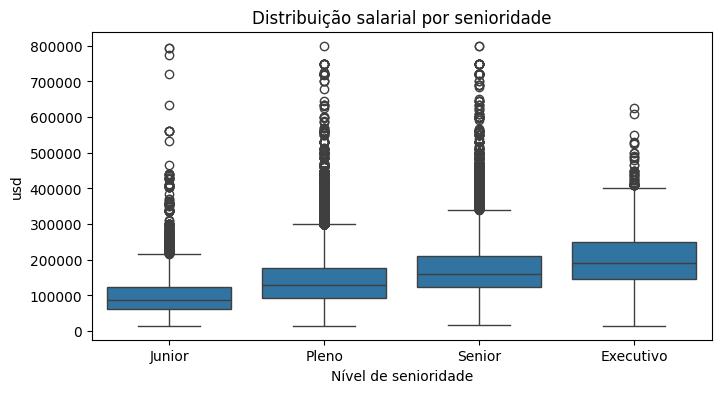

In [43]:
ordem_senioridade = ['Junior','Pleno','Senior','Executivo']

plt.figure(figsize=(8,4))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title('Distribuição salarial por senioridade')
plt.xlabel('Nível de senioridade')
plt.show()

existe alguns outliers senior que ganham mais que executivos, e estranhamente tem junior ganhando mais que outros niveis. será que deveria continuar como junior? será que é devido o pais que essa pessoa mora?

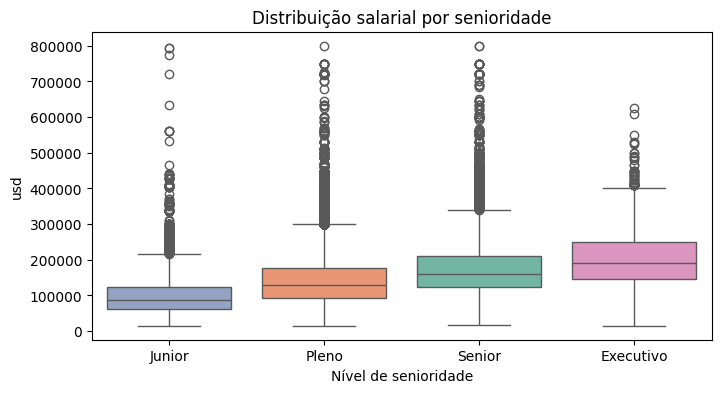

In [44]:
#colocando cor
ordem_senioridade = ['Junior','Pleno','Senior','Executivo']

plt.figure(figsize=(8,4))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade,palette='Set2',hue='senioridade')
plt.title('Distribuição salarial por senioridade')
plt.xlabel('Nível de senioridade')
plt.show()

In [45]:
#importanto outra biblioteca
import plotly.express as px

In [46]:
salario_medio_por_senioridade = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(salario_medio_por_senioridade,
             x='senioridade',
             y='usd',
             title='Média Salarial por Nível de Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})


fig.show()

In [47]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos Tipo de Trabalho Remoto'
)
fig.show()

In [48]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos Tipo de Trabalho Remoto',
             hole=0.5
)
fig.show()

In [49]:
#exibir label e porcentagem
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos Tipo de Trabalho Remoto',
             hole=0.5
)
fig.update_traces(textinfo='percent+label')
fig.show()

In [50]:
#salario do cientista de dados por pais
#pip install pycountry: converte a sigra de duas em tres letras

import pycountry

In [51]:
# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [52]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média,USA
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média,AUS
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média,USA


In [53]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)